# Working with pre-trained model Restnet18


https://pytorch.org/vision/main/auto_examples/others/plot_scripted_tensor_transforms.html#sphx-glr-auto-examples-others-plot-scripted-tensor-transforms-py


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as F
from torchvision.io import read_image

import matplotlib.pyplot as plt

# Import resnet18 model
from torchvision.models import resnet18, ResNet18_Weights

## Option 1

Loading test images


In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [29]:
cat = read_image("./cat.jpeg")
dog = read_image("./dog1.jpg")
espresso = read_image("./Espresso.jpeg")

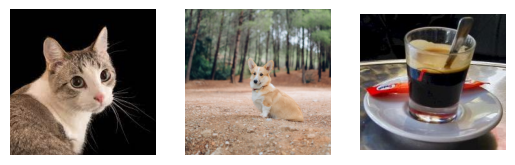

In [30]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(cat.permute(1, 2, 0))
axs[0].axis("off")

axs[1].imshow(dog.permute(1, 2, 0))
axs[1].axis("off")

axs[2].imshow(espresso.permute(1, 2, 0))
axs[2].axis("off")

plt.show()

Let's define a Predictor module that transforms the input tensor and then applies an ImageNet model on it. For this example will be using Resnet18 model.


In [39]:
class Predictor(nn.Module):
    def __init__(self):
        super(Predictor, self).__init__()
        # Load and set the model to evaluation mode
        self.weights = ResNet18_Weights.DEFAULT
        self.resnet18 = resnet18(weights=self.weights, progress=False).eval()
        self.transforms = self.weights.transforms(antialias=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        with torch.no_grad():
            x = self.transforms(x)
            y_pred = self.resnet18(x)
            return y_pred.argmax(dim=1)

In [40]:
predictor = Predictor().to(device)

Inspect the transformations for the default Resnet18

In [33]:
print(predictor.transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


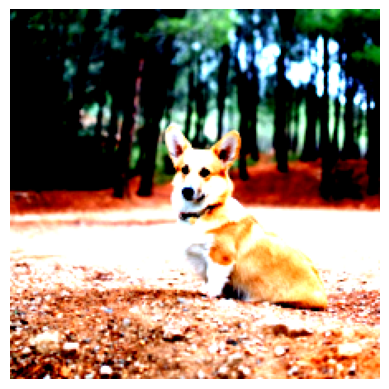

In [34]:
img_trasformed = predictor.transforms(dog)

plt.imshow(img_trasformed.permute(1, 2, 0))
plt.axis("off")
plt.show()

Apply the model on a test image

In [41]:
img = dog.to(device)

batch = img.unsqueeze(0)

with torch.no_grad():
    res = predictor(batch)

class_id = res.item()
category_name = predictor.weights.meta["categories"][class_id]

print(category_name)

Pembroke


## Option 2:


In [42]:
# Initialize model with default weights
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)

# Set model to evaluation mode
model.eval()

# Initialize the transforms
transforms = weights.transforms()

In [43]:
print(transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [45]:
img = cat.to("cpu")

# Apply preprocessing transforms
batch = transforms(img).unsqueeze(0)

with torch.no_grad():
    # Apply model with softmax layer
    prediction = model(batch).squeeze(0).softmax(0)


# Apply argmax
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(category_name)

Egyptian cat


c:\Users\jcamp\.conda\envs\deep-learning-track-gpu\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
